# Memristor

## Equation
We have an equation
$$
\mu_U \cdot \frac{R_+}{D} \cdot U \left( t \right) \cdot \theta\left( \omega \right) \cdot \theta\left( D - \omega \right)
= \frac{d\omega}{dt}
  \cdot \left[ R_+ \cdot \frac{\omega\left( t \right)}{D}
             + R_- \cdot \left( 1 - \frac{\omega\left( t \right)}{D} \right) \right]
$$
Heaviside functions product can be folded to indicator
$$
\frac{d\omega}{dt}
  \cdot \left[ R_+ \cdot \frac{\omega\left( t \right)}{D}
             + R_- \cdot \left( 1 - \frac{\omega\left( t \right)}{D} \right) \right]
  = \mu_U \cdot \frac{R_+}{D} \cdot U \left( t \right) \cdot \mathbb{1}\left( 0 < \omega\left( t \right) < D \right)
$$

This means that either
$$
\dot{\omega} = 0,\qquad \omega \notin \left( 0; D \right)
\Longrightarrow
\begin{cases}
\omega\left( t \right) = 0,\qquad \omega\left( t' \right) \le 0,\qquad t' \le t, \\
\omega\left( t \right) = D,\qquad \omega\left( t' \right) \ge D,\qquad t' \le t
\end{cases}
$$
or
$$
\omega\left( t \right) = - \frac{D \cdot R_-}{R_+ - R_-}.
$$

The second equation is possible if $D=0$, which is not possible due to equation $0 < \omega\left( t \right) < D$,
or $R_- = 0$, which is physically impossible in this problem: impedance should be greater than zero.

This means that when $\omega$ reaches $0$ or $D$, it cannot move further and we have a stable state there.
We can solve the differential equation without indicator, keeping in mind spikes of derivative.

In order to solve this differential equation we need to integrate it
$$
\int\limits_{w_c}^{w\left( t \right)} \left[ \omega\left( t \right) \cdot \frac{R_+ - R_-}{D}
             + R_- \right] d\omega
  = \mu_U \cdot \frac{R_+}{D}
      \cdot \int\limits_0^t U \left( t \right) dt
$$
Let us denote
$$
\Phi\left( t \right)
= \int\limits_0^t U \left( t \right) dt
$$

Result looks like an equation
$$
\omega^2 \cdot \frac{R_+ - R_-}{2 \cdot D} + \omega \cdot R_- - \omega_c
- \mu_U \frac{R_+}{D} \cdot \Phi\left( t \right)
= 0, \qquad
\omega_c = \omega\left( 0 \right)^2 \cdot \frac{R_+ - R_-}{2 \cdot D} + \omega\left( 0 \right) \cdot R_-
$$

Solutions are
$$
\omega_{1, 2}\left( t \right) = \frac{
        - R_- \pm \sqrt{R_-^2
        + 4 \cdot \frac{R_+ - R_-}{2 \cdot D} \cdot \left( \omega_c + \mu_U \cdot \frac{R_+}{D} \cdot \Phi\left( t \right)
        \right)
    }}
    {\frac{R_+ - R_-}{D}}
$$
Can be simplified to
$$
\omega_{1, 2}\left( t \right) = D \cdot \frac{
        - R_- \pm \sqrt{R_-^2
        + 2 \cdot \frac{R_+ - R_-}{D} \cdot \left( \omega_c + \mu_U \cdot \frac{R_+}{D} \cdot \Phi\left( t \right)
        \right)
    }}
    {R_+ - R_-}
$$

## Electric current

$$
I\left( t \right)
= \frac{D \cdot U\left( t \right)}{R_+ \cdot w\left( t \right) + R_- \cdot \left(D - w\left( t \right) \right)}
$$

## Constant voltage

Assume $U = U_0$
$$
\omega_{1, 2}\left( t \right) = D \cdot \frac{
        - R_- \pm \sqrt{R_-^2
        + 2 \cdot \frac{R_+ - R_-}{D} \left( \omega_c + \mu_U \cdot \frac{R_+}{D} \cdot U_0 \cdot t
        \right)
    }}
    {R_+ - R_-}
$$

## Sine voltage

Assume $U = U_0 \cdot \sin{\left( \nu \cdot t \right)}$
$$
\omega_{1, 2}\left( t \right) = D \cdot \frac{
        - R_- \pm \sqrt{R_-^2
        + 2 \cdot \frac{R_+ - R_-}{D}
            \cdot \left( \omega_c
            + \mu_U \cdot \frac{R_+}{D} \cdot \frac{U_0}{\nu}
            \cdot \left( 1 - \cos{\left(\nu \cdot t \right)} \right)
        \right)
    }}
    {R_+ - R_-}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

In [2]:
from matplotlib import rc
rc('font', size=18)

In [3]:
T = .1
dt = 1E-5
N = int(T/dt)
TIME = np.linspace(0, T, N)

In [4]:
SM2_TO_M2 = ((10**(-2))**2)
NM_TO_M = 10**(-9)

In [5]:
D = 10 * NM_TO_M
mu = (10**(-10)) * SM2_TO_M2
nu = 100
w0 = D / 10
R_ON = 1
R_OFF = R_ON * 160
U0 = 1

In [6]:
def get_w_initial(w0, R_ON, R_OFF, D):
    return (w0**2) * (R_ON - R_OFF) / (2 * D) + w0 * R_OFF

def _U_sqrt_right_sin(t, w0, R_ON, R_OFF, D, mu, U0, nu):
    return mu * (R_ON / D) * (U0 / nu) * (1 - np.cos(nu * t))

def _U_up(t, w0, R_ON, R_OFF, D, mu, U0, nu, _U_sqrt_right):
    return - R_OFF + (
        R_OFF**2 + 2 * ((R_ON - R_OFF) / D) * (
            get_w_initial(w0, R_ON, R_OFF, D)
            + _U_sqrt_right(t, w0, R_ON, R_OFF, D, mu, U0, nu)
        )
    )**.5

def w_sin(t, w0, R_OFF, R_ON, D, mu, U0, nu):
    values = D * (_U_up(t, w0, R_ON, R_OFF, D, mu, U0, nu, _U_sqrt_right_sin)) / (R_ON - R_OFF)
    indices = (values >= D) | (values <= 0)
    if not indices.any():
        return values
    const_index = np.where(indices)[0][0]
    const_value = values[const_index]
    values[const_index:] = const_value # D if const_value >= D else 0.0
    return values

In [7]:
def U_sin(t, U0, nu):
    return U0 * np.sin(nu * t)

In [13]:
def I(R_OFF, R_ON, D, U, w):
    return U / (R_ON * w / D + R_OFF * (1 - w / D))

# Task 1

## Time sequences

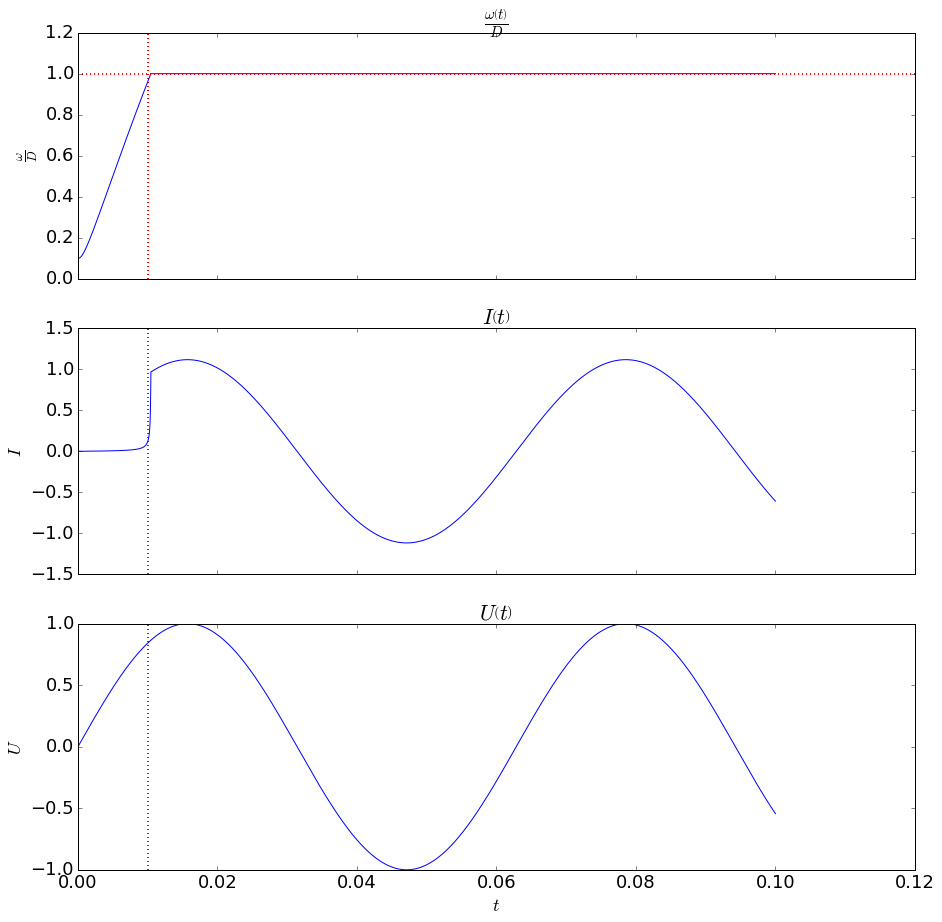

In [14]:
f, axarr = plt.subplots(3, sharex=True)

for ax in axarr:
    ax.axvline((1 / nu), linewidth=2, color='r', linestyle=':')

axarr[0].set_title(r'$\frac{\omega\left( t \right)}{D}$')
axarr[0].plot(TIME, w_sin(TIME, w0, R_ON, R_OFF, D, mu, U0, nu) / D)
axarr[0].axhline(1, linewidth=2, color='r', linestyle=':')
axarr[0].set_ylabel(r'$\frac{\omega}{D}$')

axarr[1].set_title(r'$I\left( t \right)$')
axarr[1].plot(TIME, I(R_OFF, R_ON, D, U_sin(TIME, U0, nu), w_sin(TIME, w0, R_ON, R_OFF, D, mu, U0, nu)))
axarr[1].set_ylabel('$I$')

axarr[2].set_title(r'$U\left( t \right)$')
axarr[2].plot(TIME, U_sin(TIME, U0, nu))
axarr[2].set_ylabel('$U$')

plt.xlabel('$t$')
plt.show()

## Volt-Ampere characteristics

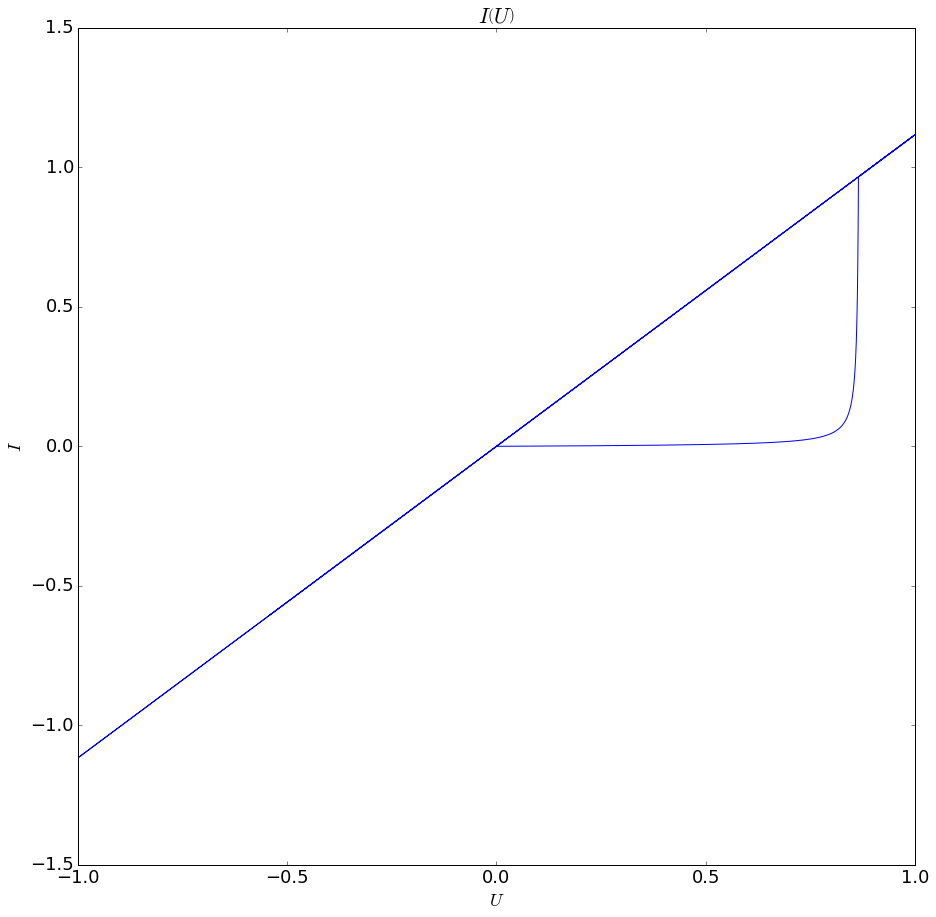

In [15]:
plt.plot(U_sin(TIME, U0, nu), I(R_OFF, R_ON, D, U_sin(TIME, U0, nu), w_sin(TIME, w0, R_ON, R_OFF, D, mu, U0, nu)))
plt.title(r'$I\left( U \right)$')
plt.xlabel('$U$')
plt.ylabel('$I$')
plt.show()

## Electric charge to magnetic flux

As long as
$$
\begin{cases}
I &= \dot{q}, \\
U &= \dot{\Phi}
\end{cases}
$$
We have
$$
\begin{cases}
q\left( t \right) &= \int\limits_{t_0}^t I\left( t \right) \\
\Phi\left( t \right) &= \int\limits_{t_0}^t U\left( t \right)
\end{cases}
$$
It's hard to integrate $I$ analytically, so numeric method can be used
$$
\int\limits_{t_0}^t I\left( t \right) \approx \sum\limits_1^n I\left( t_i \right) \cdot \Delta t,
\qquad \Delta t = \frac{t - t_0}{n},
\qquad t_i = t_0 + \Delta t \cdot n - \frac{\Delta t}{2}
$$